<a href="https://colab.research.google.com/github/programmerfaz/Machine-learning-Projects/blob/main/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic Prediction**

KNN (K Nearest Neighbour) is a supervised machine learning algorithm which is simpler, easier to implement for classification and regression related problems. The K in KNN is a number that tells the algorithm to look into K neighbour(nearby points) before arriving at a decision.

There are differnt ways of selecting K using cross-validation, elbow method. and distance metric followed includes either euclidean, manhattan, and minkowski distance method.

The Titanic KNN (K-Nearest Neighbors) machine learning algorithm is a supervised learning method used to predict survival outcomes for passengers aboard the Titanic. It works by classifying data points based on the majority class among their 'k' nearest neighbors in the feature space. Features such as passenger class, age, gender, and fare are used to determine survival likelihood. The algorithm involves preprocessing the data, calculating distances (e.g., Euclidean), selecting the nearest neighbors, and predicting outcomes based on majority voting. This approach is effective for analyzing patterns and making predictions on the Titanic dataset.

In [31]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

Fetching the data and pre processing the dataset.

In [3]:
df_train=  pd.read_csv("/content/drive/MyDrive/DATASET/Titanic/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/DATASET/Titanic/test.csv")

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The above dataset shows the details of passengers that have boarded on the titanic which includes various fields.

<ipython-input-4-adb6e5c97922>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Sex", data=df_train, palette=['blue', 'green'])


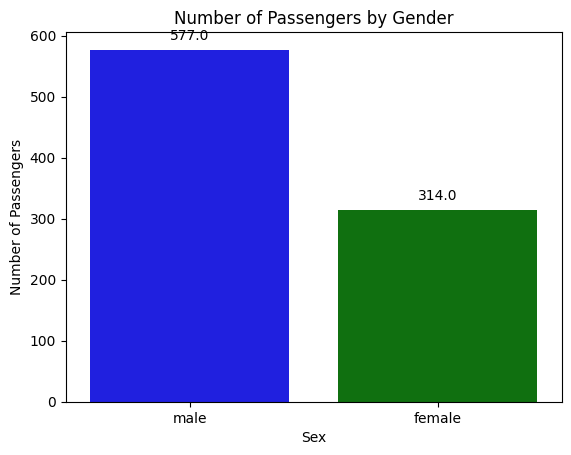

In [4]:
# Displaying the graph of male and female passengers that have boarded on the plane
# with custom colors.
ax = sns.countplot(x="Sex", data=df_train, palette=['blue', 'green'])

# Adding a title to the plot.
ax.set_title('Number of Passengers by Gender')

# Changing the y-axis label to "Number of Passengers".
ax.set_ylabel('Number of Passengers')

# Adding value labels to each bar (showing the exact count).
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#checking the total number of rows in the dataset
df_train.shape

(891, 12)

In [7]:
#removing unecessary columns from the dataset before training our model
df_train.drop(['PassengerId', 'Name', 'Ticket', 'Fare',"Cabin","Embarked"], axis=1, inplace=True)


In [8]:
#replacing all the male as 1 and female as 0 for easiness in training the model
df_train.loc[df_train['Sex']=='male','Sex']=1
df_train.loc[df_train['Sex']=='female','Sex']=0

0 -- female

1 -- male

In [9]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


In [10]:
#counting the number of male and female passengers on the titanic
df_train["Sex"].value_counts()

,count
Sex,
1,577
0,314


In [11]:
df_train["Survived"].value_counts()

,count
Survived,
0,549
1,342


<ipython-input-12-2680459d81d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x="Sex", palette=['blue', 'green'])


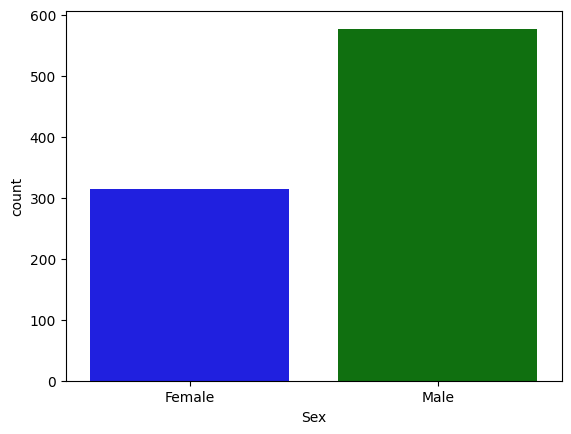

In [12]:
#plotting the graph
sns.countplot(data=df_train, x="Sex", palette=['blue', 'green'])
plt.xticks([0, 1], ['Female', 'Male'])  # Change labels here
plt.show()

In [13]:
df_train.corr()['Survived'].sort_values()

,Survived
Sex,-0.543351
Pclass,-0.338481
Age,-0.077221
SibSp,-0.035322
Parch,0.081629
Survived,1.000000


Heatmap is a function in seaborn library which graphically represents the data where the values are represented as colors.

<Axes: >

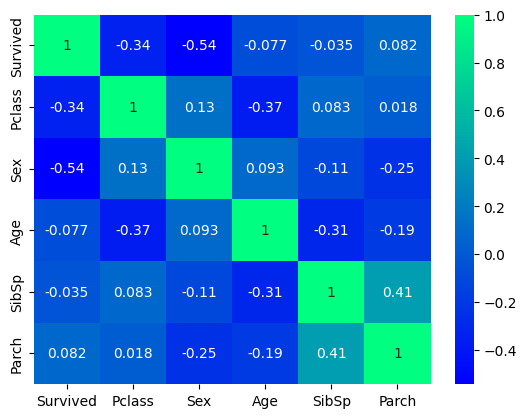

In [15]:
sns.heatmap(df_train.corr(), annot=True,cmap="winter")

Plotting all the graphs between different possible pairs available from the training dataset

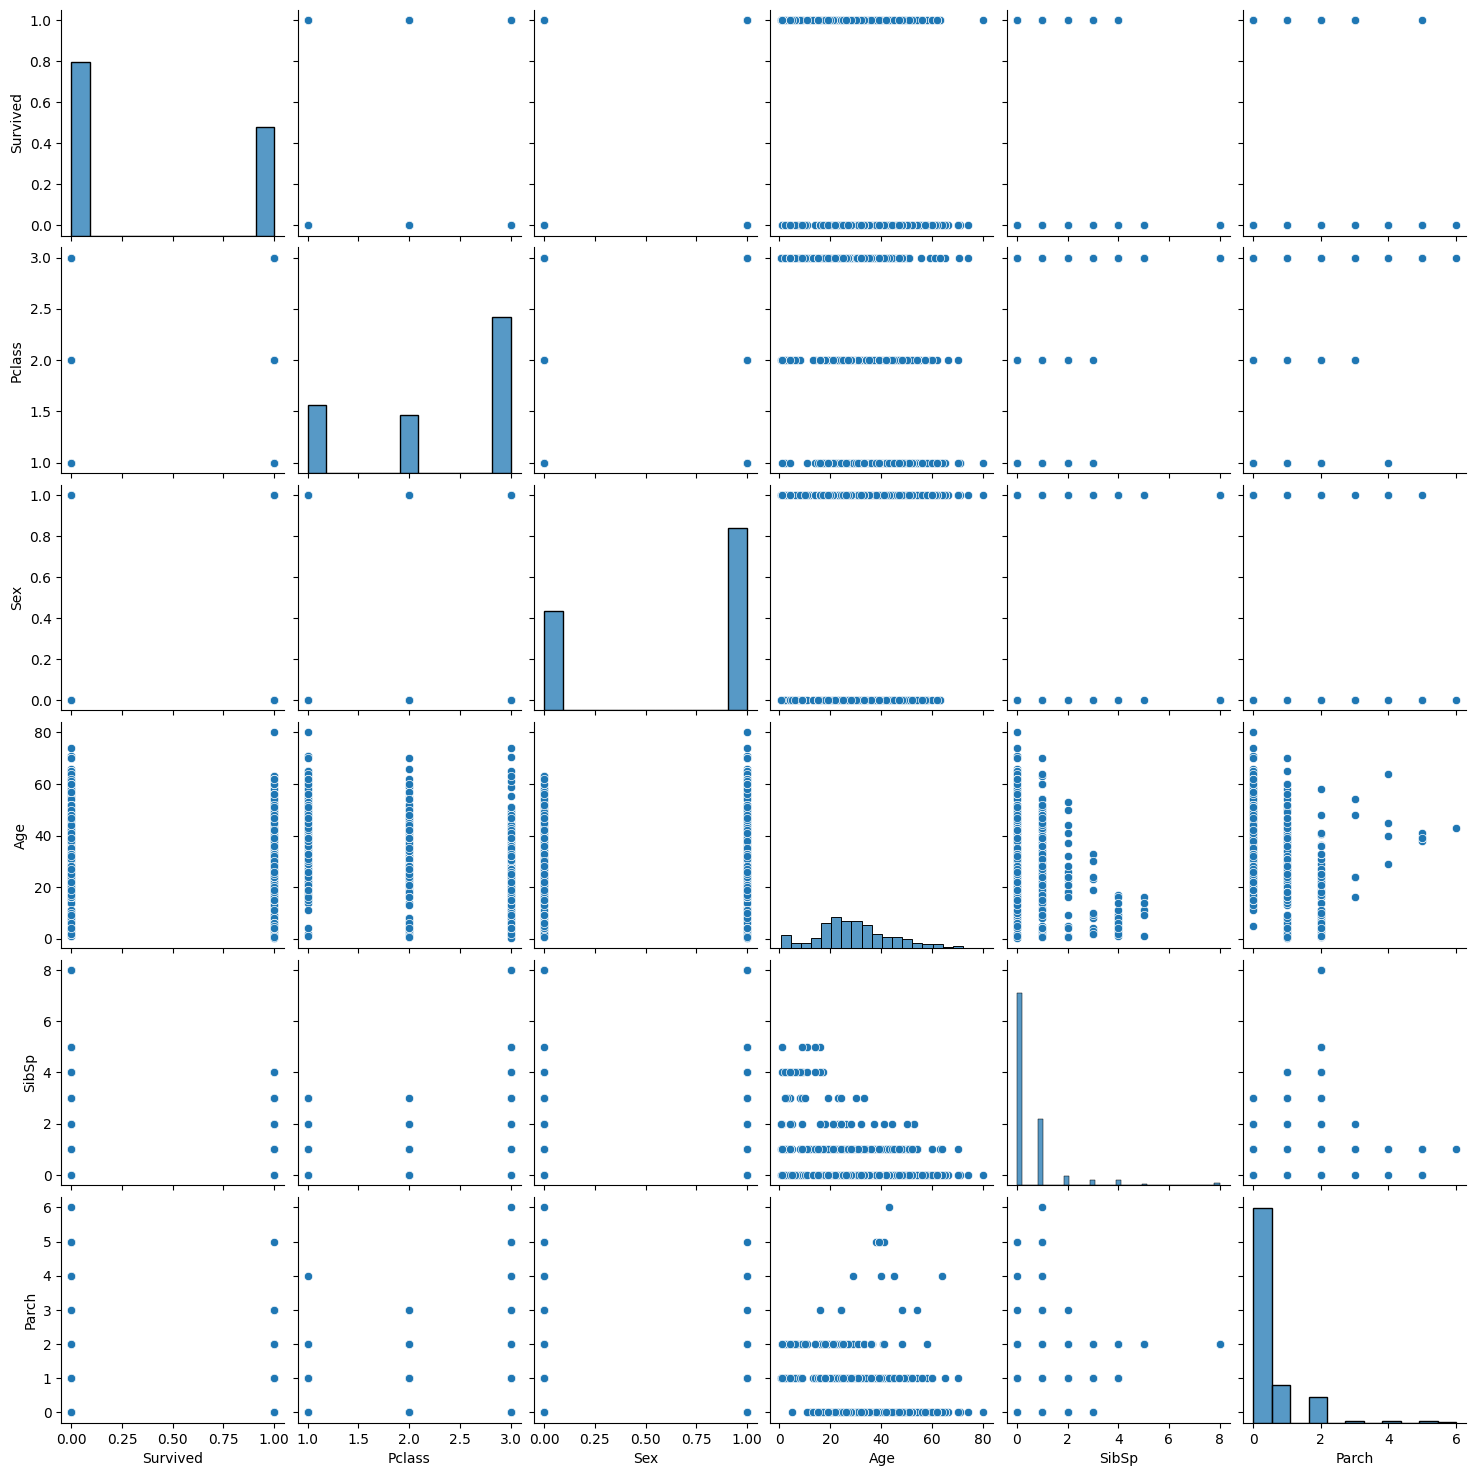

In [16]:
sns.pairplot(data=df_train)

Data preparation

In [17]:
#checking the missing data from the given dataset
df_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0


In [18]:
#filling the missing age value with the median values of the column Age
df_train["Age"] = df_train["Age"].fillna(df_train["Age"].median())

In [19]:
df_train.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0


In [20]:
#we don't have any missing values
#creating dummy variables
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [21]:
df_train.shape

(891, 6)

In [22]:
df_train["Survived"] = df_train["Survived"].apply(str)
df_train["Pclass"] = df_train["Pclass"].apply(str)

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 41.9+ KB


In [24]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


Splitting the training and testing data

In [26]:
X = df_train.drop("Survived", axis=1)
Y = df_train["Survived"]

In [29]:
print(X)

    Pclass Sex   Age  SibSp  Parch
0        3   1  22.0      1      0
1        1   0  38.0      1      0
2        3   0  26.0      0      0
3        1   0  35.0      1      0
4        3   1  35.0      0      0
..     ...  ..   ...    ...    ...
886      2   1  27.0      0      0
887      1   0  19.0      0      0
888      3   0  28.0      1      2
889      1   1  26.0      0      0
890      3   1  32.0      0      0

[891 rows x 5 columns]


In [30]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: object


In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [33]:
print(X.shape,X_train.shape,X_test.shape)

(891, 5) (712, 5) (179, 5)


In [34]:
print(Y.shape,Y_train.shape,Y_test.shape)

(891,) (712,) (179,)


In [35]:
#Training the model using KNN algorithm
model = KNeighborsClassifier(n_neighbors=5) #n_neighbour is a parameter used to tell the algorithm the number of closest datapoints it must consider before making a decision.

In [36]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

Evaluating the model

In [37]:
#predicting the accuracy score for training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

In [38]:
print("Accuracy of training data is: ",training_data_accuracy*100)

Accuracy of training data is:  85.39325842696628


In [39]:
#predicting the accuracy of testing data
X_test_prediction = model.predict(X_test)
X_test_accuracy = accuracy_score(Y_test,X_test_prediction)

In [41]:
print("Accuracy of the testing data is: ",X_test_accuracy*100)

Accuracy of the testing data is:  73.74301675977654


In [44]:
Y_pred = model.predict(X_test)

In [45]:
#displaying a report of our trained and tested data
confusion_matrix(Y_test,Y_pred)

array([[88, 12],
       [35, 44]])

In [46]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       100
           1       0.79      0.56      0.65        79

    accuracy                           0.74       179
   macro avg       0.75      0.72      0.72       179
weighted avg       0.75      0.74      0.73       179



In [47]:
#Making a predictive system
print(X_test)

    Pclass Sex   Age  SibSp  Parch
707      1   1  42.0      0      0
37       3   1  21.0      0      0
615      2   0  24.0      1      2
169      3   1  28.0      0      0
68       3   0  17.0      4      2
..     ...  ..   ...    ...    ...
89       3   1  24.0      0      0
80       3   1  22.0      0      0
846      3   1  28.0      8      2
870      3   1  26.0      0      0
251      3   0  29.0      1      1

[179 rows x 5 columns]


In [50]:
print(X_train)

    Pclass Sex   Age  SibSp  Parch
30       1   1  40.0      0      0
10       3   0   4.0      1      1
873      3   1  47.0      0      0
182      3   1   9.0      4      2
876      3   1  20.0      0      0
..     ...  ..   ...    ...    ...
534      3   0  30.0      0      0
584      3   1  28.0      0      0
493      1   1  71.0      0      0
527      1   1  28.0      0      0
168      1   1  28.0      0      0

[712 rows x 5 columns]


In [56]:
print(df_train.head())

  Survived Pclass Sex   Age  SibSp  Parch
0        0      3   1  22.0      1      0
1        1      1   0  38.0      1      0
2        1      3   0  26.0      0      0
3        1      1   0  35.0      1      0
4        0      3   1  35.0      0      0


In [61]:
X_new = pd.DataFrame(X_train.iloc[4].values.reshape(1, -1), columns=X_train.columns)#Reshape your data using array.reshape(-1, 1)

prediction = model.predict(X_new)
print(prediction)

if (prediction[0] == "0"):
  print('The passenger survived is female')
else:
  print('The passenger survived is male')

['0']
The passenger survived is female


In [63]:
X_new = pd.DataFrame(X_train.iloc[1].values.reshape(1, -1), columns=X_train.columns)#Reshape your data using array.reshape(-1, 1)

prediction = model.predict(X_new)
print(prediction)

if (prediction[0] == "0"):
  print('The passenger survived is female')
else:
  print('The passenger survived is male')

['1']
The passenger survived is male
